In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob, os
import numpy as np
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import Sequence
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import psutil


(17931, 96, 96) (6000, 3)


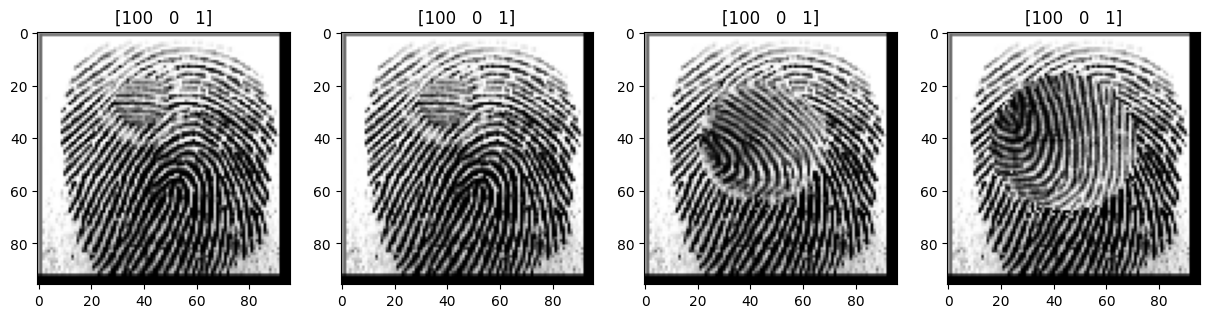

In [2]:
x_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_medium.npz')['data']
x_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_hard.npz')['data']
y_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_real.npy')
y_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_easy.npy')
y_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_medium.npy')
y_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)

plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)

plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)

plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)

plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')


C:\Users\h4uh4\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


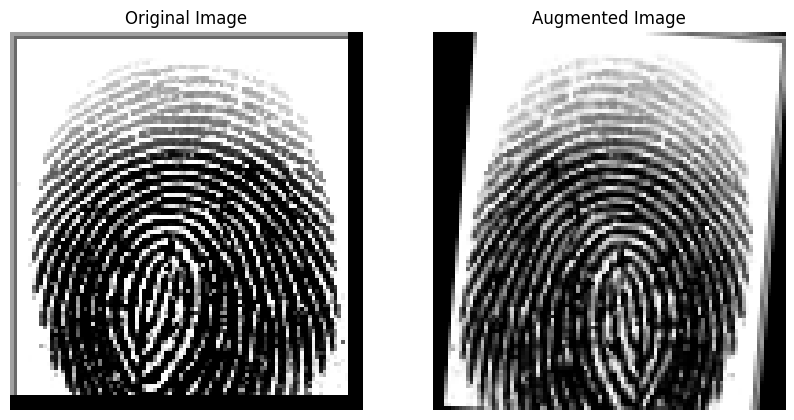

In [ ]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A


image = cv2.imread('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/Real/1__M_Left_index_finger.BMP')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


augment = A.Compose([


    A.HorizontalFlip(p=0.5),
    A.Affine(scale=(0.9, 1.1), translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, rotate=(-5, 5), p=0.7)
])





augmented = augment(image=image)
augmented_image = augmented['image']


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image)
plt.axis('off')

plt.show()


In [ ]:

x_real = x_real[:len(y_real)]


x_data = np.concatenate([x_real, x_easy, x_medium, x_hard], axis=0)
y_data = np.concatenate([y_real, y_easy, y_medium, y_hard], axis=0)

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")


half_size = len(x_data) // 2

x_data_half = x_data[:half_size]
y_data_half = y_data[:half_size]

print(f"x_data_half shape: {x_data_half.shape}")
print(f"y_data_half shape: {y_data_half.shape}")



assert x_data_half.shape[0] == y_data_half.shape[0], "Jumlah sample x_data dan y_data tidak sama!"


x_temp, x_test, y_temp, y_test = train_test_split(x_data_half, y_data_half, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


print(f"Train set size: {x_train.shape[0]} samples")
print(f"Validation set size: {x_val.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")


x_data shape: (55270, 96, 96)
y_data shape: (55270, 3)
x_data_half shape: (27635, 96, 96)
y_data_half shape: (27635, 3)
Train set size: 16581 samples
Validation set size: 5527 samples
Test set size: 5527 samples


In [ ]:

x_train = np.expand_dims(x_train, -1).astype('float32') / 255.
x_val = np.expand_dims(x_val, -1).astype('float32') / 255.
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.


In [ ]:
import numpy as np


if np.any(np.isnan(x_train)) or np.any(np.isinf(x_train)):
    print("Data input mengandung NaN atau Inf, harap perbaiki sebelum melanjutkan.")


In [ ]:
import numpy as np
import cv2
import psutil


def apply_laplacian_filter_batch(images_batch):
    laplacian_batch = []
    for img in images_batch:
        laplacian_img = cv2.Laplacian(img, cv2.CV_32F)


        if np.any(np.isnan(laplacian_img)):
            print("NaN detected in the image after Laplacian filter.")
        if np.any(np.isinf(laplacian_img)):
            print("Inf detected in the image after Laplacian filter.")

        laplacian_batch.append(laplacian_img)
    return np.array(laplacian_batch)


batch_size = 25
x_train_laplacian = []
for i in range(0, len(x_train), batch_size):
    x_train_laplacian.append(apply_laplacian_filter_batch(x_train[i:i+batch_size]))


x_train_laplacian = np.concatenate(x_train_laplacian, axis=0)


x_val_laplacian = []
for i in range(0, len(x_val), batch_size):
    x_val_laplacian.append(apply_laplacian_filter_batch(x_val[i:i+batch_size]))
x_val_laplacian = np.concatenate(x_val_laplacian, axis=0)

x_test_laplacian = []
for i in range(0, len(x_test), batch_size):
    x_test_laplacian.append(apply_laplacian_filter_batch(x_test[i:i+batch_size]))
x_test_laplacian = np.concatenate(x_test_laplacian, axis=0)


print(f"Memory usage: {psutil.virtual_memory().percent}%")


Memory usage: 66.9%


In [ ]:

print("Memeriksa dataset raw untuk NaN atau Inf...")

if np.any(np.isnan(x_data)) or np.any(np.isinf(x_data)):
    print("NaN atau Inf terdeteksi pada dataset raw!")
else:
    print("Dataset raw bersih dari NaN atau Inf.")


Memeriksa dataset raw untuk NaN atau Inf...
Dataset raw bersih dari NaN atau Inf.


In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [ ]:
import gc


gc.collect()


179

In [ ]:

x_train_laplacian = np.expand_dims(x_train_laplacian, -1).astype('float32') / np.nanmax(x_train_laplacian)
x_val_laplacian = np.expand_dims(x_val_laplacian, -1).astype('float32') / np.nanmax(x_val_laplacian)
x_test_laplacian = np.expand_dims(x_test_laplacian, -1).astype('float32') / np.nanmax(x_test_laplacian)


In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [ ]:
from tensorflow.keras.utils import Sequence


class PairGenerator(Sequence):
    def __init__(self, x, y, x_real, y_real, batch_size=32, augment_fn=None):
        self.x = x
        self.y = y
        self.x_real = x_real
        self.y_real = y_real
        self.batch_size = batch_size
        self.augment_fn = augment_fn


        self.label_real_dict = {}
        for idx, label in enumerate(self.y_real):
            key = ''.join(label.astype(str)).zfill(6)
            if key not in self.label_real_dict:
                self.label_real_dict[key] = []
            self.label_real_dict[key].append(idx)

        self.label_keys = list(self.label_real_dict.keys())

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, len(self.x))

        x1_batch = self.x[start:end]
        y_batch = self.y[start:end]
        batch_size = len(x1_batch)

        x2_batch = np.empty_like(x1_batch)
        labels = np.zeros((batch_size, 1), dtype=np.float32)

        for i, label in enumerate(y_batch):
            key = ''.join(label.astype(str)).zfill(6)

            if random.random() > 0.5 and key in self.label_real_dict:
                idx = random.choice(self.label_real_dict[key])
                x2 = self.x_real[idx]
                labels[i] = 1.
            else:
                while True:
                    unmatch_key = random.choice(self.label_keys)
                    if unmatch_key != key:
                        idx = random.choice(self.label_real_dict[unmatch_key])
                        x2 = self.x_real[idx]
                        break
                labels[i] = 0.

            x2_batch[i] = x2


            if self.augment_fn:
                x1_batch[i] = self.augment_fn(image=x1_batch[i].squeeze())['image'][..., np.newaxis]
                x2_batch[i] = self.augment_fn(image=x2_batch[i].squeeze())['image'][..., np.newaxis]

        return (x1_batch, x2_batch), labels


pair_generator = PairGenerator(x_train_laplacian, y_train, x_train_laplacian, y_train, batch_size=32)


(x1_batch, x2_batch), labels = pair_generator[0]

In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [ ]:

def build_feature_model(input_shape=(96, 96, 1)):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    model = models.Model(inputs=input_layer, outputs=x)
    return model


x1 = layers.Input(shape=(96, 96, 1))
x2 = layers.Input(shape=(96, 96, 1))


feature_model = build_feature_model()
f1 = feature_model(x1)
f2 = feature_model(x2)


diff = layers.Subtract()([f1, f2])


x = layers.Dense(128, activation='relu')(diff)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)


model = models.Model(inputs=[x1, x2], outputs=output)


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 64)        │  8,012,736 │ input_layer[0][0… │
│ (Functional)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 64)        │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ subtract[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,029,377 (30.63 MB)

 Trainable params: 8,029,377 (30.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [ ]:

x_train_laplacian = np.nan_to_num(x_train_laplacian, nan=0.0)


In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [ ]:

x_train_laplacian_normalized = (x_train_laplacian - np.min(x_train_laplacian)) / (np.max(x_train_laplacian) - np.min(x_train_laplacian))


print(f"Max value after normalization: {np.max(x_train_laplacian_normalized)}")
print(f"Min value after normalization: {np.min(x_train_laplacian_normalized)}")


Max value after normalization: 1.0
Min value after normalization: 0.0


In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [23]:
train_gen = PairGenerator(x_train_laplacian, y_train, x_train_laplacian, y_train, batch_size=32, augment_fn=augment)
val_gen = PairGenerator(x_val, y_val, x_val, y_val, batch_size=32, augment_fn=None)


In [ ]:

print(f"NaN atau Inf terdeteksi pada x_train_laplacian setelah filter Laplacian: {np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian))}")


print(f"NaN atau Inf terdeteksi pada x_val_laplacian setelah filter Laplacian: {np.any(np.isnan(x_val_laplacian)) or np.any(np.isinf(x_val_laplacian))}")
print(f"NaN atau Inf terdeteksi pada x_test_laplacian setelah filter Laplacian: {np.any(np.isnan(x_test_laplacian)) or np.any(np.isinf(x_test_laplacian))}")


NaN atau Inf terdeteksi pada x_train_laplacian setelah filter Laplacian: False
NaN atau Inf terdeteksi pada x_val_laplacian setelah filter Laplacian: False
NaN atau Inf terdeteksi pada x_test_laplacian setelah filter Laplacian: False


Batch 1:
x1 batch shape: (32, 96, 96, 1)
x2 batch shape: (32, 96, 96, 1)
Labels shape: (32, 1)


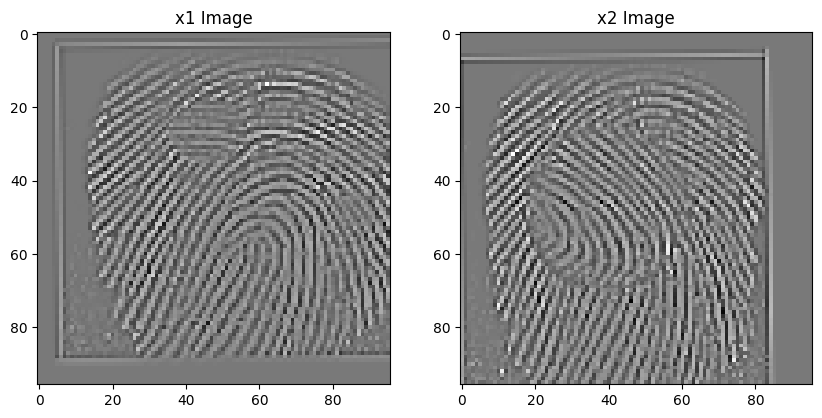

Batch 2:
x1 batch shape: (32, 96, 96, 1)
x2 batch shape: (32, 96, 96, 1)
Labels shape: (32, 1)


In [ ]:
import matplotlib.pyplot as plt


for i, (inputs, labels) in enumerate(train_gen):

    print(f"Batch {i + 1}:")
    print(f"x1 batch shape: {inputs[0].shape}")
    print(f"x2 batch shape: {inputs[1].shape}")
    print(f"Labels shape: {labels.shape}")


    if i == 0:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(inputs[0][0].squeeze(), cmap='gray')
        plt.title('x1 Image')

        plt.subplot(1, 2, 2)
        plt.imshow(inputs[1][0].squeeze(), cmap='gray')
        plt.title('x2 Image')

        plt.show()


    if i >= 1:
        break

In [26]:
if np.any(np.isnan(x1_batch)) or np.any(np.isinf(x1_batch)):
    print("NaN atau Inf terdeteksi pada x1_batch!")
if np.any(np.isnan(x2_batch)) or np.any(np.isinf(x2_batch)):
    print("NaN atau Inf terdeteksi pada x2_batch!")


In [ ]:
import numpy as np


def check_nan_in_generator(generator, num_batches=10):
    for i, (x_batch, y_batch) in enumerate(generator):
        if np.any(np.isnan(x_batch)):
            print(f"NaN detected in x_batch at batch {i}")
        if np.any(np.isnan(y_batch)):
            print(f"NaN detected in y_batch at batch {i}")

        if i >= num_batches:
            break


check_nan_in_generator(train_gen)


In [ ]:

print(f"Max value after normalization: {np.max(x_train_laplacian_normalized)}")
print(f"Min value after normalization: {np.min(x_train_laplacian_normalized)}")


Max value after normalization: 1.0
Min value after normalization: 0.0


In [ ]:
import numpy as np


if np.any(np.isnan(x_train_laplacian)):
    print("NaN detected in x_train_laplacian")
if np.any(np.isinf(x_train_laplacian)):
    print("Inf detected in x_train_laplacian")


In [ ]:

print(f"NaN atau Inf terdeteksi pada x_train_laplacian setelah filter Laplacian: {np.any(np.isnan(x_train_laplacian)) or np.any(np.isinf(x_train_laplacian))}")


print(f"NaN atau Inf terdeteksi pada x_val_laplacian setelah filter Laplacian: {np.any(np.isnan(x_val_laplacian)) or np.any(np.isinf(x_val_laplacian))}")
print(f"NaN atau Inf terdeteksi pada x_test_laplacian setelah filter Laplacian: {np.any(np.isnan(x_test_laplacian)) or np.any(np.isinf(x_test_laplacian))}")


NaN atau Inf terdeteksi pada x_train_laplacian setelah filter Laplacian: False
NaN atau Inf terdeteksi pada x_val_laplacian setelah filter Laplacian: False
NaN atau Inf terdeteksi pada x_test_laplacian setelah filter Laplacian: False


In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('nonkernel_siamese_best.h5', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  
    callbacks=[checkpoint, early_stop, lr_scheduler],
    verbose=2  
)




Epoch 1/5


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


519/519 - 225s - 433ms/step - accuracy: 0.6764 - auc: 0.7373 - loss: 0.6083 - val_accuracy: 0.6228 - val_auc: 0.9127 - val_loss: 0.6737 - learning_rate: 1.0000e-03
Epoch 2/5


519/519 - 211s - 406ms/step - accuracy: 0.7230 - auc: 0.7810 - loss: 0.5599 - val_accuracy: 0.7053 - val_auc: 0.9221 - val_loss: 0.5873 - learning_rate: 1.0000e-03
Epoch 3/5


519/519 - 194s - 375ms/step - accuracy: 0.7204 - auc: 0.7781 - loss: 0.5590 - val_accuracy: 0.8117 - val_auc: 0.9156 - val_loss: 0.4190 - learning_rate: 1.0000e-03
Epoch 4/5
519/519 - 178s - 343ms/step - accuracy: 0.7116 - auc: 0.7720 - loss: 0.5595 - val_accuracy: 0.7981 - val_auc: 0.9205 - val_loss: 0.4545 - learning_rate: 1.0000e-03
Epoch 5/5
519/519 - 178s - 343ms/step - accuracy: 0.7147 - auc: 0.7745 - loss: 0.5518 - val_accuracy: 0.8187 - val_auc: 0.9201 - val_loss: 0.4300 - learning_rate: 1.0000e-03


In [ ]:

model.save('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_Siamese/ModelSiam/laplacian_siam_final_model.keras')



Shapes: (5527, 96, 96, 1) (5527, 96, 96, 1) (5527, 1)


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
  0%|          | 0/100 [00:00<?, ?it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


  1%|          | 1/100 [00:13<21:29, 13.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


  2%|▏         | 2/100 [00:25<21:02, 12.88s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  3%|▎         | 3/100 [00:38<20:35, 12.73s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  4%|▍         | 4/100 [00:50<20:17, 12.68s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  5%|▌         | 5/100 [01:03<19:59, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  6%|▌         | 6/100 [01:16<19:44, 12.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  7%|▋         | 7/100 [01:28<19:30, 12.58s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  8%|▊         | 8/100 [01:41<19:16, 12.57s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


  9%|▉         | 9/100 [01:53<19:03, 12.57s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 10%|█         | 10/100 [02:06<18:53, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 11%|█         | 11/100 [02:18<18:40, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step


 12%|█▏        | 12/100 [02:31<18:24, 12.56s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 13%|█▎        | 13/100 [02:43<18:12, 12.55s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 14%|█▍        | 14/100 [02:56<18:01, 12.58s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 15%|█▌        | 15/100 [03:09<17:50, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 16%|█▌        | 16/100 [03:21<17:38, 12.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 17%|█▋        | 17/100 [03:34<17:23, 12.57s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 18%|█▊        | 18/100 [03:46<17:12, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 19%|█▉        | 19/100 [03:59<17:03, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 20%|██        | 20/100 [04:12<16:48, 12.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 21%|██        | 21/100 [04:24<16:34, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step


 22%|██▏       | 22/100 [04:37<16:19, 12.56s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 23%|██▎       | 23/100 [04:49<16:08, 12.57s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 24%|██▍       | 24/100 [05:02<15:56, 12.58s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 25%|██▌       | 25/100 [05:15<15:45, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 26%|██▌       | 26/100 [05:27<15:35, 12.64s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 27%|██▋       | 27/100 [05:40<15:20, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 28%|██▊       | 28/100 [05:52<15:05, 12.58s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 29%|██▉       | 29/100 [06:05<14:51, 12.56s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 30%|███       | 30/100 [06:18<14:41, 12.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 31%|███       | 31/100 [06:30<14:34, 12.68s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 32%|███▏      | 32/100 [06:43<14:24, 12.71s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 33%|███▎      | 33/100 [06:56<14:13, 12.75s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 34%|███▍      | 34/100 [07:09<13:59, 12.72s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 35%|███▌      | 35/100 [07:21<13:45, 12.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 36%|███▌      | 36/100 [07:34<13:30, 12.66s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 37%|███▋      | 37/100 [07:47<13:19, 12.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 38%|███▊      | 38/100 [08:00<13:09, 12.73s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 39%|███▉      | 39/100 [08:12<12:53, 12.68s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 40%|████      | 40/100 [08:25<12:37, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 41%|████      | 41/100 [08:37<12:23, 12.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 42%|████▏     | 42/100 [08:50<12:11, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 43%|████▎     | 43/100 [09:03<11:59, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 44%|████▍     | 44/100 [09:15<11:46, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 45%|████▌     | 45/100 [09:28<11:32, 12.59s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 46%|████▌     | 46/100 [09:40<11:21, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 47%|████▋     | 47/100 [09:53<11:09, 12.64s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 48%|████▊     | 48/100 [10:06<10:55, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 49%|████▉     | 49/100 [10:18<10:44, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 50%|█████     | 50/100 [10:31<10:31, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 51%|█████     | 51/100 [10:43<10:18, 12.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 52%|█████▏    | 52/100 [10:56<10:06, 12.64s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 53%|█████▎    | 53/100 [11:09<09:52, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 54%|█████▍    | 54/100 [11:21<09:40, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 55%|█████▌    | 55/100 [11:34<09:28, 12.64s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 56%|█████▌    | 56/100 [11:47<09:15, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 57%|█████▋    | 57/100 [11:59<09:02, 12.62s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 58%|█████▊    | 58/100 [12:12<08:51, 12.65s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 59%|█████▉    | 59/100 [12:25<08:41, 12.72s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 60%|██████    | 60/100 [12:37<08:27, 12.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 61%|██████    | 61/100 [12:50<08:13, 12.65s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


 62%|██████▏   | 62/100 [13:02<07:59, 12.61s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 63%|██████▎   | 63/100 [13:15<07:47, 12.65s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 64%|██████▍   | 64/100 [13:28<07:37, 12.72s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step


 65%|██████▌   | 65/100 [13:41<07:28, 12.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step


 66%|██████▌   | 66/100 [13:54<07:17, 12.87s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 67%|██████▋   | 67/100 [14:07<07:04, 12.85s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 68%|██████▊   | 68/100 [14:20<06:51, 12.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 69%|██████▉   | 69/100 [14:33<06:37, 12.84s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 70%|███████   | 70/100 [14:45<06:23, 12.79s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 71%|███████   | 71/100 [14:58<06:09, 12.75s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 72%|███████▏  | 72/100 [15:11<05:57, 12.77s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 73%|███████▎  | 73/100 [15:23<05:43, 12.74s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 74%|███████▍  | 74/100 [15:36<05:31, 12.73s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 75%|███████▌  | 75/100 [15:49<05:18, 12.74s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 76%|███████▌  | 76/100 [16:02<05:06, 12.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 77%|███████▋  | 77/100 [16:15<04:53, 12.77s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 78%|███████▊  | 78/100 [16:27<04:41, 12.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 79%|███████▉  | 79/100 [16:40<04:28, 12.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 80%|████████  | 80/100 [16:53<04:17, 12.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 81%|████████  | 81/100 [17:06<04:04, 12.85s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 82%|████████▏ | 82/100 [17:19<03:51, 12.83s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 83%|████████▎ | 83/100 [17:32<03:37, 12.82s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 84%|████████▍ | 84/100 [17:44<03:24, 12.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 85%|████████▌ | 85/100 [17:57<03:11, 12.76s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 86%|████████▌ | 86/100 [18:10<02:58, 12.77s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 87%|████████▋ | 87/100 [18:23<02:46, 12.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 88%|████████▊ | 88/100 [18:36<02:33, 12.83s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step


 89%|████████▉ | 89/100 [18:49<02:21, 12.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 90%|█████████ | 90/100 [19:01<02:08, 12.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 91%|█████████ | 91/100 [19:14<01:56, 12.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 92%|█████████▏| 92/100 [19:27<01:43, 12.91s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step


 93%|█████████▎| 93/100 [19:40<01:30, 12.95s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 94%|█████████▍| 94/100 [19:53<01:17, 12.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 95%|█████████▌| 95/100 [20:06<01:04, 12.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


 96%|█████████▌| 96/100 [20:19<00:51, 12.88s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 97%|█████████▋| 97/100 [20:32<00:38, 12.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


 98%|█████████▊| 98/100 [20:44<00:25, 12.82s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


 99%|█████████▉| 99/100 [20:57<00:12, 12.80s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


100%|██████████| 100/100 [21:10<00:00, 12.71s/it]

Bootstrap AUC mean: 0.8870
95% Confidence Interval: [0.8760, 0.8955]
Indices dipilih: [ 0 24 49 74 99]
Nilai AUC diambil: [0.88593835 0.88540498 0.88998406 0.89087854 0.89011797]


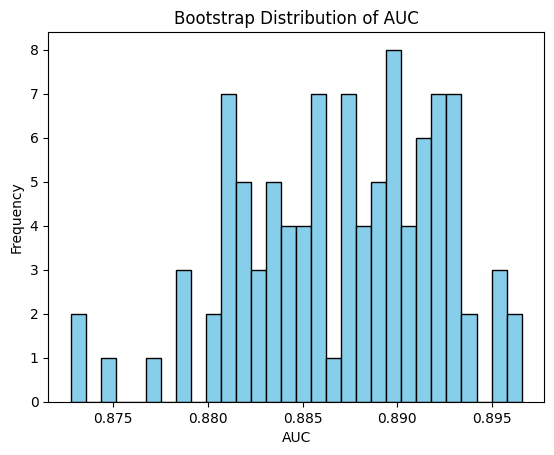

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm


test_gen = PairGenerator(x_test_laplacian, y_test, x_test_laplacian, y_test, batch_size=32, augment_fn=augment)

x1_list, x2_list, y_list = [], [], []
for i in range(len(test_gen)):
    (x1_batch, x2_batch), y_batch = test_gen[i]
    x1_list.append(x1_batch)
    x2_list.append(x2_batch)
    y_list.append(y_batch)

x_test_1 = np.concatenate(x1_list, axis=0)
x_test_2 = np.concatenate(x2_list, axis=0)
y_test_full = np.concatenate(y_list, axis=0)
y_test_full = y_test_full[:len(x_test_1)]

print("Shapes:", x_test_1.shape, x_test_2.shape, y_test_full.shape)


model_local = load_model('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_Siamese/ModelSiam/laplacian_siam_final_model.keras')

B = 100
n = len(x_test_1)
num_classes = len(np.unique(y_test_full))
results = []

for seed in tqdm(range(B), total=B):
    np.random.seed(seed)
    idx = np.random.choice(n, size=n, replace=True)
    x1_bs, x2_bs, y_bs = x_test_1[idx], x_test_2[idx], y_test_full[idx]

    y_pred_probs = model_local.predict([x1_bs, x2_bs], batch_size=32)
    y_bs_bin = label_binarize(y_bs, classes=range(num_classes))

    auc = roc_auc_score(y_bs_bin, y_pred_probs, multi_class='ovr', average='macro')
    results.append(auc)

auc_scores = np.array(results)
mean_auc = np.mean(auc_scores)
ci_lower, ci_upper = np.percentile(auc_scores, [2.5, 97.5])

print(f"Bootstrap AUC mean: {mean_auc:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


indices = np.linspace(0, len(auc_scores) - 1, 5, dtype=int)
sampled_aucs = auc_scores[indices]

print("Indices dipilih:", indices)
print("Nilai AUC diambil:", sampled_aucs)


with open("laplacian_bootstrap_auc_results.txt", "w") as f:
    f.write("Sampled 5 AUC values (berjarak):\n")
    for val in sampled_aucs:
        f.write(f"{val:.6f}\n")
    f.write("\n")
    f.write(f"Bootstrap AUC mean: {mean_auc:.4f}\n")
    f.write(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n\n")
    f.write("All Bootstrap AUC scores:\n")
    for val in auc_scores:
        f.write(f"{val:.6f}\n")


plt.hist(auc_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Distribution of AUC')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.show()


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8630 - auc: 0.9267 - loss: 0.3480
Test Loss: 0.348798006772995
Test Accuracy: 0.861045777797699
Test AUC: 0.923480749130249


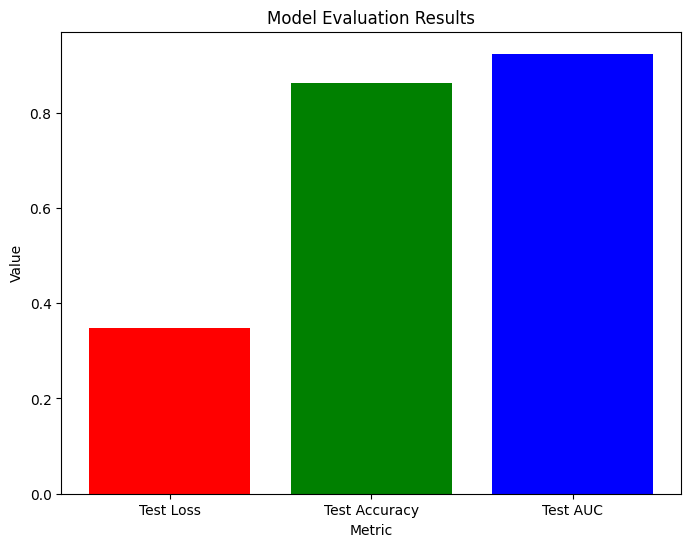

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

test_gen = PairGenerator(x_test_laplacian, y_test, x_test_laplacian, y_test, batch_size=32, augment_fn=None)


test_loss, test_accuracy, test_auc = model.evaluate(test_gen)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


results = [test_loss, test_accuracy, test_auc]
labels = ['Test Loss', 'Test Accuracy', 'Test AUC']


plt.figure(figsize=(8, 6))
plt.bar(labels, results, color=['red', 'green', 'blue'])


plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Results')


plt.show()
